In [17]:
import numpy as np
# Import our plotting module
import matplotlib.pyplot as plt
# Import the Iris dataset from scikit-learn
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
%matplotlib inline

/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Feature transformation algorithms are able to construct new features by selecting the best of all columns and combining this latent structure with a few brand new column. They can utilize small bits of information from all columns in every new super-column, so we do not need to create an inordinate amount of new columns to capture latent feature interactions. They never create more columns than we start with, and are still able to extract the latent structure that feature construction columns attempt to extract. 

# The Iris Dataset

In [2]:
# Load the Iris dataset
iris = load_iris()

In [3]:
# Separate the features and response variable
iris_X, iris_y = iris.data, iris.target

In [4]:
# The names of the flower we are trying to predict.
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
# Names of the features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# For labelling: {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
label_dict = {i: k for i, k in enumerate(iris.target_names)}

def plot(X, y, title, x_label, y_label):
    ax = plt.subplot(111)
    
    for label,marker,color in zip(
    range(3),('^', 's', 'o'),('blue', 'red', 'green')):
        plt.scatter(x=X[:,0].real[y == label],
            y=X[:,1].real[y == label],
            color=color,
            alpha=0.5,
            label=label_dict[label]
            )

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

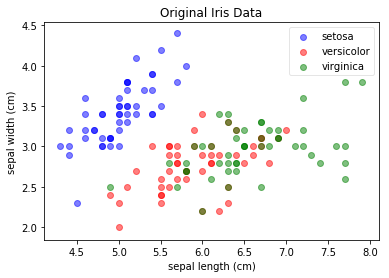

In [7]:
plot(iris_X, iris_y, "Original Iris Data", "sepal length (cm)", "sepal width (cm)")

## Principal Component Analysis (PCA)

PCA takes datasets that have several correlated features and projects them onto a coordinate (axis) system that has fewer correlated features. These new uncorrelated features (super-columns) are called <b>principal components</b>. They serve as an alternative coordinate system to the original feature space that requires fewer features and captures as much variance as possible. PCA is itself an <b>unsupervised</b> task, does not utilize a response column in order to make the transformation.

A PCA works by invoking a process called the <b>eigenvalue decomposition</b> of the covariance of a matrix. The process happens in four steps:
1. Create the covariance matrix of the dataset
2. Calculate the eigenvalues of the covariance matrix
3. Keep the top k eigenvalues (sorted by the descending eigenvalues)
4. Use the kept eigenvectors to transform new data-points

In [ ]:
# Compute a PCA manually

In [9]:
# Calculate the mean vector
mean_vector = iris_X.mean(axis=0)
print(mean_vector)

# calculate the covariance matrix
cov_mat = np.cov((iris_X).T)
print(cov_mat.shape)

[5.84333333 3.054      3.75866667 1.19866667]
(4, 4)


In [10]:
cov_mat

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [12]:
# Calculate the eigenvectors and eigenvalues of our covariance matrix of the iris dataset
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

# Print the eigen vectors and corresponding eigenvalues in order of descending eigenvalues
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:,i]
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_cov))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print(30 * '-')

Eigenvector 1: 
[ 0.36158968 -0.08226889  0.85657211  0.35884393]
Eigenvalue 1 from covariance matrix: 4.224840768320107
------------------------------
Eigenvector 2: 
[-0.65653988 -0.72971237  0.1757674   0.07470647]
Eigenvalue 2 from covariance matrix: 0.242243571627515
------------------------------
Eigenvector 3: 
[-0.58099728  0.59641809  0.07252408  0.54906091]
Eigenvalue 3 from covariance matrix: 0.07852390809415474
------------------------------
Eigenvector 4: 
[ 0.31725455 -0.32409435 -0.47971899  0.75112056]
Eigenvalue 4 from covariance matrix: 0.023683027126001163
------------------------------


In [13]:
# The percentages of the variance captured by each eigenvalue
# is equal to the eigenvalue of that components divided by
# the sum of all eigen values
explained_variance_ratio = eig_val_cov/eig_val_cov.sum()
explained_variance_ratio

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

Text(0,0.5,'% of Variance Explained <= k')

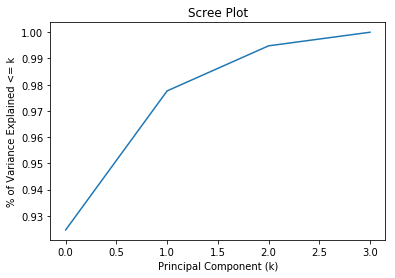

In [14]:
# Scree Plot
plt.plot(np.cumsum(explained_variance_ratio))
plt.title('Scree Plot')
plt.xlabel('Principal Component (k)')
plt.ylabel('% of Variance Explained <= k')

In [15]:
# Store the top two eigenvectors in a variable
top_2_eigenvectors = eig_vec_cov[:,:2].T

# Show the transpose so that each row is a principal component, we have two rows == two components
top_2_eigenvectors

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [-0.65653988, -0.72971237,  0.1757674 ,  0.07470647]])

In [16]:
# To transform our data from having shape (150, 4) to (150, 2)
# we will multiply the matrices of our data and our eigen vectors together
# notice how I am centering the data first. I am doing this to replicate how scikit-learn PCA's algorithm functions
np.dot(iris_X, top_2_eigenvectors.T)[:5,]

array([[ 2.82713597, -5.64133105],
       [ 2.79595248, -5.14516688],
       [ 2.62152356, -5.17737812],
       [ 2.7649059 , -5.00359942],
       [ 2.78275012, -5.64864829]])

In [ ]:
# Scikit-learn's version of PCA

In [18]:
# Like any other sklearn module, we first instantiate the class
pca = PCA(n_components=2)

In [19]:
# Fit the PCA to our data
pca.fit(iris_X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
pca.components_
# Note that the second column is the negative of the manual process
# this is because eignevectors can be positive or negative
# It should have little to no effect on our machine learning pipelines

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [21]:
# sklearn's PCA centers the data first while transforming, so these numbers won't match our manual process.
pca.transform(iris_X)[:5,]

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456]])

In [22]:
# Manually center our data to match scikit-learn's implementation of PCA
np.dot(iris_X-mean_vector, top_2_eigenvectors.T)[:5,]

array([[-2.68420713, -0.32660731],
       [-2.71539062,  0.16955685],
       [-2.88981954,  0.13734561],
       [-2.7464372 ,  0.31112432],
       [-2.72859298, -0.33392456]])

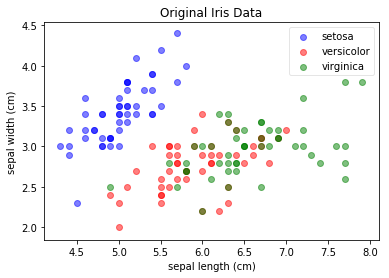

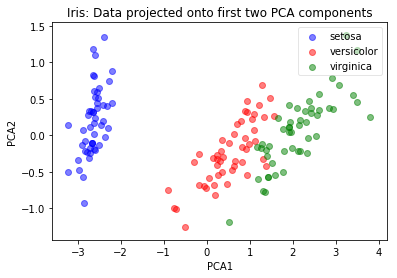

In [23]:
# Plot the original and projected data
plot(iris_X, iris_y, "Original Iris Data", "sepal length (cm)", "sepal width (cm)")
plt.show()
plot(pca.transform(iris_X), iris_y, "Iris: Data projected onto first two PCA components", "PCA1", "PCA2")

In [24]:
# Percentage of variance in data explained by each component
# same as what we calculated earlier
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

In [ ]:
# Show how pca attempts to eliminate dependence between columns

By nature, in the eigenvalue decomposition procedure, the resulting principal components are perpendicular to each other, meaning that they are <b>linearly independently</b> of one another, so we expect that the average correlation of the projected dataset should be much closer to zero.

In [25]:
# Capture all four principal components
full_pca = PCA(n_components=4)

# Fit our PCA to the iris dataset
full_pca.fit(iris_X)

# Show the correlation matrix of the original dataset
np.corrcoef(iris_X.T)

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

In [26]:
# Correlation coefficients above the diagonal
np.corrcoef(iris_X.T)[[0, 0, 0, 1, 1], [1, 2, 3, 2, 3]]

array([-0.10936925,  0.87175416,  0.81795363, -0.4205161 , -0.35654409])

In [27]:
# Average correlation of original iris dataset.
np.corrcoef(iris_X.T)[[0, 0, 0, 1, 1], [1, 2, 3, 2, 3]].mean()

0.16065567094168517

In [28]:
pca_iris = full_pca.transform(iris_X)
# Average correlation of PCAed iris dataset.
np.corrcoef(pca_iris.T)[[0, 0, 0, 1, 1], [1, 2, 3, 2, 3]].mean()
# Very close to 0 because columns are independent from one another
# This is an important consequence of performing an eigen value decomposition

-5.260986846249321e-17

In [ ]:
# How centering and scaling data affects PCA

In [29]:
# Import our scaling module
from sklearn.preprocessing import StandardScaler

In [30]:
# Center our data, not a full scaling
X_centered = StandardScaler(with_std=False).fit_transform(iris_X)
X_centered[:5,]

array([[-0.74333333,  0.446     , -2.35866667, -0.99866667],
       [-0.94333333, -0.054     , -2.35866667, -0.99866667],
       [-1.14333333,  0.146     , -2.45866667, -0.99866667],
       [-1.24333333,  0.046     , -2.25866667, -0.99866667],
       [-0.84333333,  0.546     , -2.35866667, -0.99866667]])

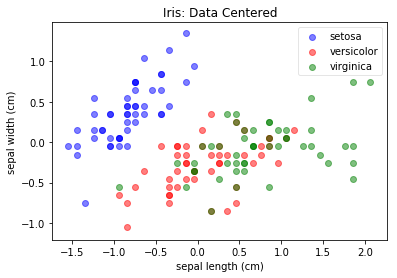

In [31]:
# Plot our centered data
plot(X_centered, iris_y, "Iris: Data Centered", "sepal length (cm)", "sepal width (cm)")

In [32]:
# Fit our PCA (with n_components still set to 2) on our centered data
pca.fit(X_centered)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [33]:
# Same components as before
pca.components_  

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [34]:
# Same projection when data are centered because PCA does this automatically
pca.transform(X_centered)[:5,] 

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456]])

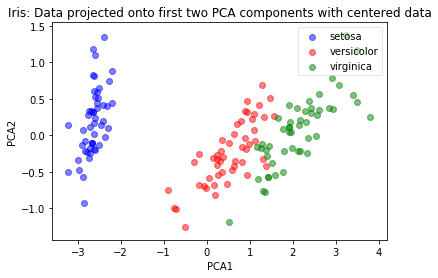

In [35]:
# Plot PCA projection of centered data, same as previous PCA projected data
plot(pca.transform(X_centered), iris_y, "Iris: Data projected onto first two PCA components with centered data", "PCA1", "PCA2")

In [36]:
# Percentage of variance in data explained by each component
pca.explained_variance_ratio_
# Matrices have the same covariance matrix as their centered counterparts. If two matrices have 
# the same covariance matrix, then they will have the same eigenvalue decomposition.

array([0.92461621, 0.05301557])

In [37]:
# Do a normal z score scaling
X_scaled = StandardScaler().fit_transform(iris_X)

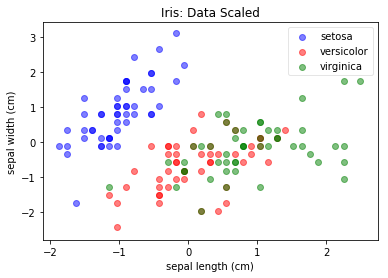

In [38]:
# Plot scaled data
plot(X_scaled, iris_y, "Iris: Data Scaled", "sepal length (cm)", "sepal width (cm)")

In [39]:
# Fit our 2-dimensional PCA on our scaled data
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [40]:
# Different components as cenetered data
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

In [41]:
# Different projection when data are scaled
pca.transform(X_scaled)[:5,]  

array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731],
       [-2.30419716, -0.57536771],
       [-2.38877749,  0.6747674 ]])

In [42]:
# Percentage of variance in data explained by each component
pca.explained_variance_ratio_
# Once we scaled our data, the columns' covariance with one another became more consistent and 
# the variance explained by each principal component was spread out instead of being solidified in a single PC.
# In practice and production, we generally recommend scaling, but it's a good idea to test your pipeline's 
# performance on both scaled and un-scaled data.

array([0.72770452, 0.23030523])

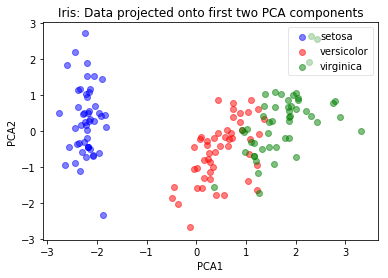

In [43]:
# Plot PCA projection of scaled data
plot(pca.transform(X_scaled), iris_y, "Iris: Data projected onto first two PCA components", "PCA1", "PCA2")
# Slightly different